In [ ]:
from google.colab import drive

import time
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from math import nan, isnan
from mlxtend.frequent_patterns import apriori


In [ ]:
df_book_ratings = pd.read_csv('/content/gdrive/MyDrive/Ratings.csv',encoding='unicode_escape')
df_books = pd.read_csv('/content/gdrive/MyDrive/Books.csv')
df_users = pd.read_csv('/content/gdrive/MyDrive/Users.csv',encoding='unicode_escape')



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_book_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:

df_final = pd.merge(df_book_ratings,df_books,on = ['ISBN'],how='left')

In [ ]:
df_final = pd.merge(df_final,df_users, on= ['User-ID'], how='left')

In [ ]:
df_null  = df_final[df_final['Book-Title'].isnull()]

In [ ]:
df_null

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
6,276736,3257224281,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"salzburg, salzburg, austria",NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"sydney, new south wales, australia",14.0
9,276745,342310538,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"berlin, berlin, germany",27.0
25,276748,3442437407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jubail ind.-city, eastern province, saudi arabia",39.0
26,276751,033390804X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"zuerich, zh, switzerland",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1149444,276675,0747252327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"mooroolbark, victoria, australia",57.0
1149446,276679,8804413530,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"beverly hills, yukon territory, vietnam",NaN
1149581,276680,0679781587,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hopewell junction, new york, usa",55.0
1149758,276697,8445072897,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"oviedo, asturias, spain",29.0


In [ ]:
df_drop_null = df_final.dropna()

In [ ]:
df_drop_null = df_drop_null.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)

In [ ]:
df_drop_null

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,"paris, n/a, france",37.0
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1149756,276690,0590581066,0,Triplet Trouble and the Red Heart Race (Triple...,Debbie Dadey,1996,Scholastic Paperbacks,http://images.amazon.com/images/P/0590581066.0...,http://images.amazon.com/images/P/0590581066.0...,http://images.amazon.com/images/P/0590581066.0...,"wakeman, ohio, usa",43.0
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,"wakeman, ohio, usa",43.0
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,"mannington, west virginia, usa",38.0


In [ ]:
most_read = df_drop_null['Book-Title'].value_counts().reset_index()
most_read.columns = ['Book-Title', 'COUNT']

In [ ]:


most_read.shape

(205170, 2)

In [ ]:
atleast_50_books = most_read[most_read['COUNT'] >= 50]

In [ ]:
df_final = pd.merge(atleast_50_books,df_drop_null, on= ['Book-Title'], how='left')

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final

,Book-Title,COUNT,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,Wild Animus,2141,276925,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"barcelona, barcelona, spain",22.0
1,Wild Animus,2141,276939,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"poissy, yvelines, france",23.0
2,Wild Animus,2141,276954,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"freiburg, baden-wuerttemberg, germany",43.0
3,Wild Animus,2141,277157,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"garden grove, california, usa",70.0
4,Wild Animus,2141,277378,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"vancouver, british columbia, canada",33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169254,Sister of My Heart,50,270713,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,"toronto, ontario, canada",27.0
169255,Sister of My Heart,50,273086,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,"chicago, illinois, usa",33.0
169256,Sister of My Heart,50,273587,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,"den haag, zuid-holland, netherlands",60.0
169257,Sister of My Heart,50,274004,038548951X,8,Chitra Banerjee Divakaruni,2000,Anchor Pub,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,http://images.amazon.com/images/P/038548951X.0...,"sydenham, london, england, united kingdom",41.0


In [ ]:
atleast_50_books

,Book-Title,COUNT
0,Wild Animus,2141
1,The Lovely Bones: A Novel,920
2,The Da Vinci Code,708
3,Bridget Jones's Diary,599
4,The Nanny Diaries: A Novel,573
...,...,...
1568,Hornet Flight,50
1569,Passage,50
1570,Last Orders,50
1571,Confessions of a Sociopathic Social Climber : ...,50


In [ ]:
most_user = df_drop_null['User-ID'].value_counts().reset_index()
most_user.columns = ['User-ID', 'COUNT']

In [ ]:
atleast_200_users = most_user[most_user['COUNT'] >= 200]

In [ ]:
df_final = pd.merge(atleast_200_users,df_final, on= ['User-ID'], how='left')

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final

,User-ID,COUNT_x,Book-Title,COUNT_y,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,http://images.amazon.com/images/P/067169507X.0...,http://images.amazon.com/images/P/067169507X.0...,http://images.amazon.com/images/P/067169507X.0...,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,http://images.amazon.com/images/P/0842329269.0...,http://images.amazon.com/images/P/0842329269.0...,http://images.amazon.com/images/P/0842329269.0...,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,http://images.amazon.com/images/P/074322535X.0...,http://images.amazon.com/images/P/074322535X.0...,http://images.amazon.com/images/P/074322535X.0...,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,http://images.amazon.com/images/P/0515118559.0...,http://images.amazon.com/images/P/0515118559.0...,http://images.amazon.com/images/P/0515118559.0...,"newport news, virginia, usa",51.0


In [ ]:
df_final = df_final.rename(columns = {'COUNT_x':'Books_User_Rated','COUNT_y':'Book_Was_Rated'})

In [ ]:
df_final

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,http://images.amazon.com/images/P/067169507X.0...,http://images.amazon.com/images/P/067169507X.0...,http://images.amazon.com/images/P/067169507X.0...,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,http://images.amazon.com/images/P/0842329269.0...,http://images.amazon.com/images/P/0842329269.0...,http://images.amazon.com/images/P/0842329269.0...,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,http://images.amazon.com/images/P/074322535X.0...,http://images.amazon.com/images/P/074322535X.0...,http://images.amazon.com/images/P/074322535X.0...,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,http://images.amazon.com/images/P/0515118559.0...,http://images.amazon.com/images/P/0515118559.0...,http://images.amazon.com/images/P/0515118559.0...,"newport news, virginia, usa",51.0


In [ ]:
import seaborn as sns

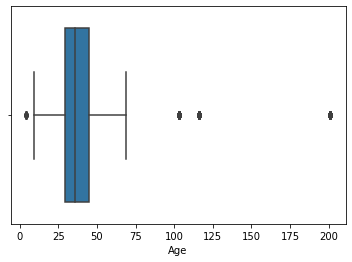

In [ ]:
sns.boxplot(data = df_final, x='Age')

In [ ]:
df_final = df_final[df_final['Age']<100]

In [ ]:
df_final = df_final[df_final['Age']>4]

In [ ]:
df_final['Age'].max()

69.0

In [ ]:
df_final

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,http://images.amazon.com/images/P/067169507X.0...,http://images.amazon.com/images/P/067169507X.0...,http://images.amazon.com/images/P/067169507X.0...,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,http://images.amazon.com/images/P/0842329269.0...,http://images.amazon.com/images/P/0842329269.0...,http://images.amazon.com/images/P/0842329269.0...,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,http://images.amazon.com/images/P/074322535X.0...,http://images.amazon.com/images/P/074322535X.0...,http://images.amazon.com/images/P/074322535X.0...,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,http://images.amazon.com/images/P/0515118559.0...,http://images.amazon.com/images/P/0515118559.0...,http://images.amazon.com/images/P/0515118559.0...,"newport news, virginia, usa",51.0


In [ ]:
df_final['Age'].describe()

count    69531.000000
mean        37.392300
std         10.917806
min          9.000000
25%         29.000000
50%         36.000000
75%         45.000000
max         69.000000
Name: Age, dtype: float64

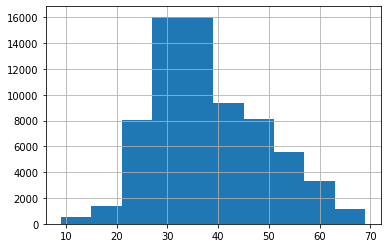

In [ ]:
df_final['Age'].hist()

In [ ]:



df_final_list = df_final.groupby('User-ID')['Book-Title'].apply(list).reset_index()

In [ ]:
df_final_list

,User-ID,Book-Title
0,254,"[Bridget Jones's Diary, The Secret Life of Bee..."
1,2276,"[The Runaway Jury, The Brethren, The King of T..."
2,2766,"[Wild Animus, The Lovely Bones: A Novel, The S..."
3,2977,"[Wild Animus, The Testament, The Firm, Jurassi..."
4,3363,"[Wild Animus, The Lovely Bones: A Novel, The D..."
...,...,...
636,274301,"[Wild Animus, The Nanny Diaries: A Novel, The ..."
637,274308,"[The Da Vinci Code, Bridget Jones's Diary, Ang..."
638,275970,"[The Secret Life of Bees, Divine Secrets of th..."
639,277427,"[Wild Animus, The Lovely Bones: A Novel, The D..."


In [ ]:
df_lst = df_final_list['Book-Title'].to_list()

In [ ]:

te = TransactionEncoder()


In [ ]:
te_arr = te.fit(df_lst).transform(df_lst)

In [ ]:
df_ap = pd.DataFrame(te_arr, columns=te.columns_)

In [ ]:
df_ap

,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,3rd Degree,4 Blondes,84 Charing Cross Road,...,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wouldn't Take Nothing for My Journey Now,Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
637,False,False,False,False,False,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,False
638,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
639,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_sets = apriori(df_ap,min_support = 0.1, use_colnames=True)

In [ ]:
frequent_sets

,support,itemsets
0,0.179407,(1st to Die: A Novel)
1,0.137285,(2nd Chance)
2,0.126365,(A Bend in the Road)
3,0.101404,"(A Child Called \It\"": One Child's Courage to ..."
4,0.162246,(A Is for Alibi (Kinsey Millhone Mysteries (Pa...
...,...,...
317,0.104524,"(Wild Animus, To Kill a Mockingbird)"
318,0.101404,"(Tuesdays with Morrie: An Old Man, a Young Man..."
319,0.109204,"(Wild Animus, Where the Heart Is (Oprah's Book..."
320,0.101404,"(A Time to Kill, The Client, The Pelican Brief)"


In [ ]:
confidence_1 = association_rules(frequent_sets, metric="confidence",
                  min_threshold=0.4).sort_values('lift', ascending=False)

In [ ]:
confidence_1.to_excel("rules.xlsx")

In [ ]:
confidence_1.to_csv('data.xlsx')
!cp data.xlsx "/content/gdrive/MyDrive"

In [ ]:
df_final['ISBN'] = df_final['ISBN'].apply(lambda x: x.zfill(10))


In [ ]:
lst_book = df_final['ISBN'].to_list()

In [ ]:
lst_book = list(set(lst_book))

In [ ]:
import json
from urllib.request import urlopen
import time

In [ ]:
from tqdm import tqdm
chunk_size = 300
lst_book1 = [lst_book[i:i + chunk_size] for i in range(0, len(lst_book), chunk_size)]


In [ ]:
isbn_book = []
genre_book = []
api = "https://www.googleapis.com/books/v1/volumes?q=isbn:"
for book in tqdm(lst_book1[12]):
  isbn = book.strip()

  resp = urlopen(api + isbn)
  book_data = json.load(resp)
  if 'items' in book_data and 'volumeInfo' in book_data['items'][0]:
        isbn_book.append(book_data['items'][0]['volumeInfo']['industryIdentifiers'][0]['identifier'])
        if 'categories' in book_data['items'][0]['volumeInfo']:
            genre_book.append(book_data['items'][0]['volumeInfo']['categories'][0])
        else:
            genre_book.append("no category")
  else:
    isbn_book.append("no book")
    genre_book.append("no category")
  time.sleep(5)

df_genre = pd.DataFrame({'ISBN':isbn_book,'Genre':genre_book})


In [ ]:
df_genre = pd.DataFrame()

for i in range(14):

  df = pd.read_csv(f'/content/gdrive/MyDrive/book_genre/chunk{i+1}.csv')
  df = df.drop('Unnamed: 0',axis=1)
  df_genre = pd.concat([df_genre,df])

In [ ]:
df_genre = df_genre[df_genre['ISBN'] != 'no book']

In [ ]:
df_final

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,"newport news, virginia, usa",51.0


In [ ]:
df_genre_new = df_genre.drop_duplicates()

In [ ]:
df_genre_new[['ISBN']].value_counts().to_frame().reset_index()

,ISBN,0
0,0373484410,2
1,9780553210095,2
2,9780679457527,2
3,0805063897,2
4,0007110928,1
...,...,...
2459,0446611212,1
2460,0446611476,1
2461,044661162X,1
2462,0446611638,1


In [ ]:
df_genre_new.to_excel("genre_isbn.xlsx")

In [ ]:
df_genre_new[df_genre_new['ISBN'] == '0805063897']

,ISBN,Genre
296,0805063897,Business & Economics
245,0805063897,Social Science


In [ ]:
df_clean_genre = pd.read_excel('/content/gdrive/MyDrive/book_genre/genre.xlsx')

In [ ]:
df_clean_genre

,Unnamed: 0,ISBN,Genre
0,0,0451167856,Fiction
1,1,0399148817,Fiction
2,2,0671727583,Fiction
3,3,9780385335836,Fiction
4,5,051512608X,Fiction
...,...,...,...
2388,72,0802134475,Fiction
2389,73,9780679457527,Travel
2390,74,0812558626,Fiction
2391,75,9780553213164,Juvenile Fiction


In [ ]:
df_clean_genre['Genre'] = df_clean_genre['Genre'].apply(lambda x : x.lower())

In [ ]:
df_clean_genre['Genre'].value_counts()

fiction                        1763
juvenile fiction                119
biography & autobiography        53
humor                            19
horror tales                     12
                               ... 
time travel                       1
language arts & disciplines       1
geishas                           1
totalitarianism                   1
bereavement                       1
Name: Genre, Length: 236, dtype: int64

In [ ]:
df_clean_genre = df_clean_genre.drop('Unnamed: 0',axis=1)

In [ ]:
df_clean_genre['Genre']

0                fiction
1                fiction
2                fiction
3                fiction
4                fiction
              ...       
2388             fiction
2389              travel
2390             fiction
2391    juvenile fiction
2392             fiction
Name: Genre, Length: 2393, dtype: object

In [ ]:
df_final_c = pd.merge(df_final,df_clean_genre, on= ['ISBN'], how='left')

In [ ]:
df_final_c = df_final_c.dropna()

In [ ]:
df_final_c['Genre'].value_counts()

fiction                      23620
juvenile fiction              1016
biography & autobiography      615
humor                          347
social science                 164
                             ...  
christianity                     1
college teachers                 1
utah                             1
african american authors         1
rape victims                     1
Name: Genre, Length: 212, dtype: int64

In [ ]:
df_final_c.to_excel("/content/gdrive/MyDrive/book_genre/final_book.xlsx")

In [ ]:
df_final['Book-Title'].value_counts()

Wild Animus                                                               282
The Lovely Bones: A Novel                                                 214
Bridget Jones's Diary                                                     212
The Notebook                                                              181
The Nanny Diaries: A Novel                                                177
                                                                         ... 
The Wasp Factory                                                            9
Northern Lights (His Dark Materials S.)                                     8
Dead Famous                                                                 6
Horse Whisperer                                                             6
Stupid White Men. Eine Abrechnung mit dem Amerika unter George W. Bush      1
Name: Book-Title, Length: 1572, dtype: int64

In [ ]:
df_final_c['Book-Rating'].value_counts()

0     22647
8      1686
10     1593
9      1411
7       976
5       493
6       365
4        88
3        44
2        29
1        26
Name: Book-Rating, dtype: int64

In [ ]:
df_plot = pd.DataFrame()

In [ ]:
plot_df = df_final_c[['User-ID','Book-Title','Book-Rating']]

In [ ]:
plot_df = plot_df.set_index('Book-Title')


In [ ]:
d

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0,fiction
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0,fiction
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0,fiction
6,198711,6456,Harry Potter and the Sorcerer's Stone (Harry P...,418,059035342X,0,J. K. Rowling,1999,Arthur A. Levine Books,"little canada, minnesota, usa",62.0,juvenile fiction
7,198711,6456,Snow Falling on Cedars,415,067976402X,0,David Guterson,1995,Vintage Books USA,"little canada, minnesota, usa",62.0,fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
69522,141902,200,Soul Harvest: The World Takes Sides (Left Behi...,80,0842329250,0,Tim Lahaye,1999,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction
69523,141902,200,Revenge of the Middle-Aged Woman,77,0142003727,0,Elizabeth Buchan,2003,Penguin USA (Paper),"newport news, virginia, usa",51.0,fiction
69525,141902,200,The Prayer of Jabez: Breaking Through to the B...,70,1576737330,10,Bruce Wilkinson,2000,Multnomah,"newport news, virginia, usa",51.0,religion
69527,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction


In [ ]:
p = pd.pivot_table(df_final_c, values='Book-Rating', index='Book-Title',
                    columns=['User-ID'])


In [ ]:
p

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Writ of Execution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Wuthering Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Wuthering Heights (Penguin Classics),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
p = p.fillna(0)

In [ ]:
p.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(p.values)
distances, indices = knn.kneighbors(p.values, n_neighbors=5)

In [ ]:
distances

array([[2.22044605e-16, 5.93861534e-01, 6.26282454e-01, 6.41511428e-01,
        6.52055500e-01],
       [0.00000000e+00, 6.53448360e-01, 6.72384616e-01, 6.90729867e-01,
        7.01935214e-01],
       [0.00000000e+00, 5.32219730e-01, 5.32219730e-01, 5.32219730e-01,
        5.91337365e-01],
       ...,
       [0.00000000e+00, 2.31778720e-01, 5.03604338e-01, 6.55058463e-01,
        6.75510300e-01],
       [0.00000000e+00, 4.56071707e-01, 4.99129677e-01, 5.06885639e-01,
        5.14465844e-01],
       [0.00000000e+00, 5.74371735e-01, 5.86803065e-01, 5.97088518e-01,
        6.12305857e-01]])

In [ ]:
p_r = p.reset_index()

In [ ]:
p_r

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6251,6323,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
0,1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Writ of Execution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,Wuthering Heights (Penguin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lst = []
lst1 = []
lst2 = []
lst3 = []
lst4 = []


for value in indices:
  for x in range(len(value)):
   
    lst.append(p_r.iloc[value[x]]['Book-Title'])
    lst1.append(p_r.iloc[value[x+1]]['Book-Title'])
    lst2.append(p_r.iloc[value[x+2]]['Book-Title'])
    lst3.append(p_r.iloc[value[x+3]]['Book-Title'])
    lst4.append(p_r.iloc[value[x+4]]['Book-Title'])
    
    
    break

In [ ]:
df_rec = pd.DataFrame({'Book':lst,'Similar-book1':lst1,'Similar-book2':lst2,'Similar-book3':lst3,'Similar-book4':lst4})


In [ ]:
df_rec =  df_rec.drop_duplicates()

In [ ]:
df_rec.shape

(884, 5)

In [ ]:
df_rec.to_excel('/content/gdrive/MyDrive/book_genre/book_rec.xlsx')

In [ ]:
p_r

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6251,6323,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
0,1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Writ of Execution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,Wuthering Heights (Penguin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
u = 254

In [ ]:
p

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Writ of Execution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights (Penguin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def user(u):
  read = []
  recs = []
  for m in p_r[p_r[u] > 0][u].index.tolist():
    read.append(m)
  for m in p_r[p_r[u] ==0][u].index.tolist():
    recs.append(m)
  return read, recs

In [ ]:
read, rec = user(u)

In [ ]:
sim_books = []
sim_dists = []
for i in rec:

    k = indices[i]
    d =distances[i]
    sim = []
    dist = []
    for j in range(0,k.shape[0]):
     
      sim.append(k[j])
      dist.append(d[j])
    
    sim_books.append(sim)
    sim_dists.append(dist)
      
        
  
    

In [ ]:
p_r

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6251,6323,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
0,1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Writ of Execution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,Wuthering Heights (Penguin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings = []
df_new = df_final_c[df_final_c['User-ID']==254]
for i in sim_books:
  r = []
  for j in i:
    b = p_r.iloc[j]['Book-Title']
    k = df_new[df_new['Book-Title']== b]['Book-Rating'].to_list()
    if len(k) >0:
      r.append(k[0])
    else:
      r.append(0)
  ratings.append(r)
    



In [ ]:
ratings[0]

[0, 0, 0, 0, 0]

In [ ]:
pred= []
for i in range(len(sim_books)):
  pred.append(np.sum(np.array(sim_dists[i])*np.array(ratings[i]))/np.sum(sim_dists[i]))




In [ ]:
b_title = []
for i in sim_books:
  b_title.append(p_r.iloc[i[0]]['Book-Title'])

d_pred = pd.DataFrame({'Book':b_title,'Rating_pred':pred})
  

In [ ]:
d_pred.to_excel('/content/gdrive/MyDrive/book_genre/book_rec_257.xlsx')

In [ ]:
df_final[df_final['User-ID']==254]

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
54836,254,300,Bridget Jones's Diary,599,014028009X,0,Helen Fielding,1999,Penguin Books,"minneapolis, minnesota, usa",24.0
54837,254,300,The Secret Life of Bees,547,0142001740,9,Sue Monk Kidd,2003,Penguin Books,"minneapolis, minnesota, usa",24.0
54838,254,300,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"minneapolis, minnesota, usa",24.0
54839,254,300,Harry Potter and the Chamber of Secrets (Book 2),425,0439064864,9,J. K. Rowling,1999,Scholastic,"minneapolis, minnesota, usa",24.0
54840,254,300,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,9,J. K. Rowling,2000,Scholastic,"minneapolis, minnesota, usa",24.0
...,...,...,...,...,...,...,...,...,...,...,...
54918,254,300,James and the Giant Peach,54,0375814248,0,ROALD DAHL,2002,Knopf Books for Young Readers,"minneapolis, minnesota, usa",24.0
54919,254,300,The Death of Vishnu: A Novel,54,006000438X,0,Manil Suri,2002,Perennial,"minneapolis, minnesota, usa",24.0
54920,254,300,"The Lion, the Witch, and the Wardrobe (The Chr...",53,0064471047,7,C. S. Lewis,1994,HarperCollins,"minneapolis, minnesota, usa",24.0
54921,254,300,Hitchhikers's Guide to the Galaxy,53,0671527215,0,Douglas Adams,1984,Pocket,"minneapolis, minnesota, usa",24.0


# Popularity based

In [ ]:
df_final_c

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0,fiction
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0,fiction
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0,fiction
6,198711,6456,Harry Potter and the Sorcerer's Stone (Harry P...,418,059035342X,0,J. K. Rowling,1999,Arthur A. Levine Books,"little canada, minnesota, usa",62.0,juvenile fiction
7,198711,6456,Snow Falling on Cedars,415,067976402X,0,David Guterson,1995,Vintage Books USA,"little canada, minnesota, usa",62.0,fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
69522,141902,200,Soul Harvest: The World Takes Sides (Left Behi...,80,0842329250,0,Tim Lahaye,1999,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction
69523,141902,200,Revenge of the Middle-Aged Woman,77,0142003727,0,Elizabeth Buchan,2003,Penguin USA (Paper),"newport news, virginia, usa",51.0,fiction
69525,141902,200,The Prayer of Jabez: Breaking Through to the B...,70,1576737330,10,Bruce Wilkinson,2000,Multnomah,"newport news, virginia, usa",51.0,religion
69527,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction


In [ ]:
R = df_final_c.groupby('ISBN').mean().reset_index()[['ISBN','Book-Rating']]

In [ ]:
M = 50

In [ ]:
R = R.rename(columns={'Book-Rating':'Avg-Rating'})

In [ ]:
df_pop = df_final_c.copy()

In [ ]:
df_pop['m'] = 50

In [ ]:
df_pop = pd.merge(df_pop, R, on = ['ISBN'], how = 'left')

In [ ]:
df_pop

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre,m,Avg-Rating
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0,fiction,50,0.414894
1,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0,fiction,50,1.742690
2,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0,fiction,50,1.449612
3,198711,6456,Harry Potter and the Sorcerer's Stone (Harry P...,418,059035342X,0,J. K. Rowling,1999,Arthur A. Levine Books,"little canada, minnesota, usa",62.0,juvenile fiction,50,3.154412
4,198711,6456,Snow Falling on Cedars,415,067976402X,0,David Guterson,1995,Vintage Books USA,"little canada, minnesota, usa",62.0,fiction,50,1.741007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29353,141902,200,Soul Harvest: The World Takes Sides (Left Behi...,80,0842329250,0,Tim Lahaye,1999,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction,50,2.032258
29354,141902,200,Revenge of the Middle-Aged Woman,77,0142003727,0,Elizabeth Buchan,2003,Penguin USA (Paper),"newport news, virginia, usa",51.0,fiction,50,2.941176
29355,141902,200,The Prayer of Jabez: Breaking Through to the B...,70,1576737330,10,Bruce Wilkinson,2000,Multnomah,"newport news, virginia, usa",51.0,religion,50,1.607143
29356,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction,50,1.541667


In [ ]:
df_pop['c'] = df_pop['Book-Rating'].mean()


In [ ]:
df_pop['Weighted-avg'] = df_pop['Book_Was_Rated']*df_pop['Avg-Rating']/(df_pop['Book_Was_Rated'] + df_pop['m']) + df_pop['m']*df_pop['c']/(df_pop['Book_Was_Rated'] + df_pop['m'])

In [ ]:
df_pop = df_pop.sort_values(by = 'Weighted-avg', ascending=False)

In [ ]:
df_pop.head(20)

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre,m,Avg-Rating,c,Weighted-avg
22456,109574,315,The Secret Life of Bees,547,0786243066,10,Sue Monk Kidd,2002,Thorndike Press,"edmonton, alberta, canada",50.0,fiction,50,10.0,1.845221,9.317020
14583,112001,588,The Notebook,456,0606191267,10,Nicholas Sparks,2000,Turtleback Books Distributed by Demco Media,"barren springs, virginia, usa",43.0,fiction,50,10.0,1.845221,9.194192
14831,63714,582,Jurassic Park,383,1852865024,10,Walter Simonson,1993,Titan Books,"milton keynes, england, united kingdom",29.0,jurassic park (motion picture),50,10.0,1.845221,9.058340
15022,82893,565,Fahrenheit 451,297,0345274318,10,Bradbury,1977,Not Avail,"san antonio, texas, usa",40.0,book burning,50,10.0,1.845221,8.824960
9464,56399,1036,When the Wind Blows,284,0140094199,10,Raymond Briggs,1982,Penguin USA,"n/a, surrey, united kingdom",63.0,fiction,50,10.0,1.845221,8.779225
24075,239594,278,Life of Pi,516,184195425X,9,Yann Martel,2004,Pub Group West,"leuven, vlaams-brabant, belgium",28.0,fiction,50,9.0,1.845221,8.367952
14170,69971,607,"The Return of the King (The Lord of the Rings,...",170,0395082560,10,J. R. R. Tolkien,1988,Houghton Mifflin Co,"pinehurst, north carolina, usa",43.0,"fantasy fiction, english",50,10.0,1.845221,8.146641
22466,109574,315,"The Return of the King (The Lord of the Rings,...",170,0395082560,10,J. R. R. Tolkien,1988,Houghton Mifflin Co,"edmonton, alberta, canada",50.0,"fantasy fiction, english",50,10.0,1.845221,8.146641
21315,78553,345,"The Return of the King (The Lord of the Rings,...",170,0395082560,10,J. R. R. Tolkien,1988,Houghton Mifflin Co,"el cajon, california, usa",40.0,"fantasy fiction, english",50,10.0,1.845221,8.146641
21316,78553,345,The Gift,166,0821759167,10,Constance O'Day-Flannery,1998,Zebra Books,"el cajon, california, usa",40.0,fiction,50,10.0,1.845221,8.112320
